In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
omega = 10
alfa = 0.4
def p_0(t, omega): return np.power(
    np.cos(omega/2*t),2)

def p_0_noisy(t, omega, alfa):
    return p_0(t, omega) * np.exp(-alfa*t) + 0.5*(1-np.exp(-alfa*t))

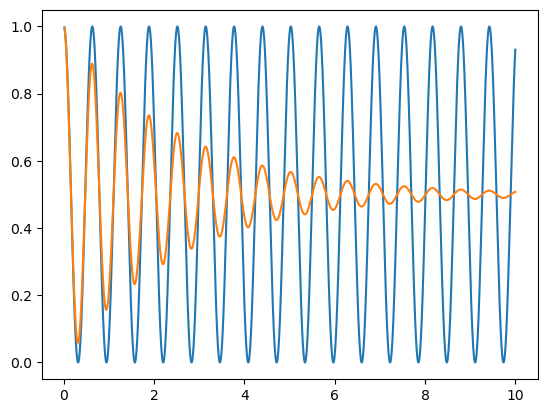

In [3]:
t = np.linspace(0.01, 10, 5000)
plt.plot(t, p_0(t, omega))
plt.plot(t, p_0_noisy(t, omega, alfa ))

In [4]:
def fisher_inf_clean(t, omega): 
    return np.power(np.cos(omega*0.5*t)*t, 2)* (1/p_0(t, omega) + 1/(1-p_0(t, omega)))

def fisher_inf_noisy(t, omega, alfa): 
    return np.power(np.exp(-alfa*t)*(-np.cos(omega*0.5*t)**2*t + t/2), 2)* (1/p_0_noisy(t, omega, alfa) + 1/(1-p_0_noisy(t, omega, alfa)))

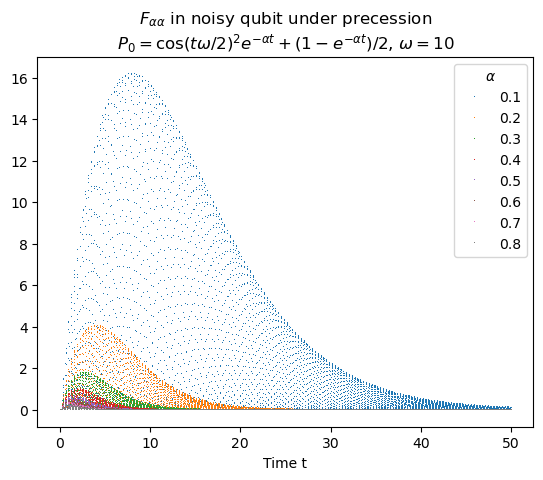

In [5]:
t = np.linspace(0.01, 50, 5000)

omega = 10
alfas = np.linspace(0.1, 0.8, 8)

# plt.plot(t, fisher_inf_clean(t, omega))
for alfa in alfas:

    plt.plot(t, fisher_inf_noisy(t, omega, alfa), ',',   label=f'{np.round(alfa,1)}')
plt.legend(title=r'$\alpha$')
# plt.xscale('log')
plt.title(r'$F_{\alpha\alpha}$ in noisy qubit under precession' + "\n" +
r'$P_0 = \cos(t \omega /2  )^2  e^{-\alpha t}+ (1- e^{-\alpha t})/2 $, $\omega = 10$' )
plt.xlabel('Time t')
# plt.yscale('log')
plt.show()    


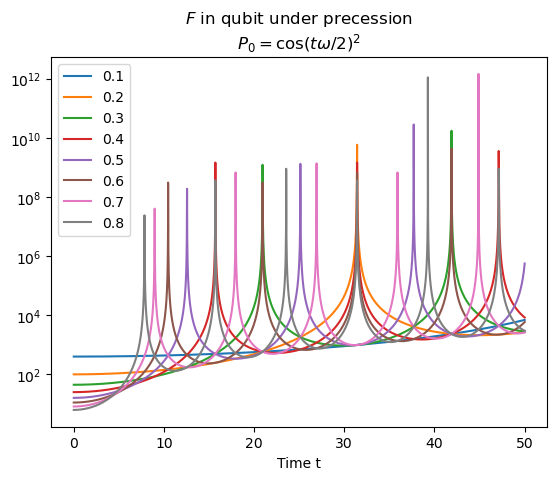

In [6]:
t = np.linspace(0.01, 50, 5000)

# omega = 10
omegas = np.linspace(0.1, 0.8, 8)

# plt.plot(t, fisher_inf_clean(t, omega))
for omega in omegas:

    plt.plot(t, fisher_inf_clean(t, omega), '-',   label=f'{np.round(omega,1)}')
plt.legend()
# plt.xscale('log')
plt.title(r'$F$ in qubit under precession' + "\n" +
r'$P_0 = \cos(t \omega /2  )^2   $' )
plt.yscale('log')
plt.xlabel('Time t')
plt.show()   

In [7]:
w = np.ones(len(alfas))/np.sum(np.ones(len(alfas)))

In [8]:
omega

0.8

In [9]:
exp_f = lambda t : np.sum([w * fisher_inf_noisy(t,omega,  alfa) for alfa in alfas])

In [10]:
exp_f(2.3)

0.6426906174421159

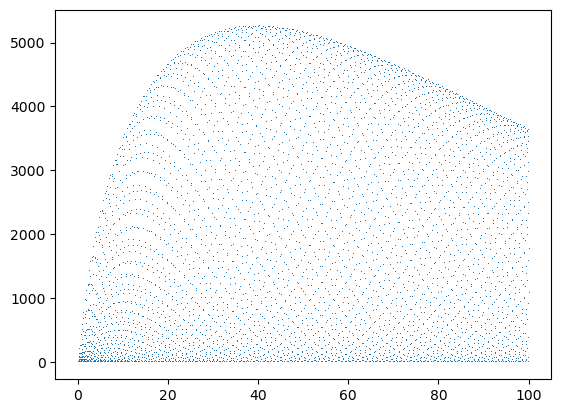

In [11]:
t = np.linspace(0.01, 100, 5000)

omega = 10
alfas = np.linspace(0.01, 0.4, 150)

w = np.ones(len(alfas)) / np.sum(np.ones(len(alfas)))

exp_f = np.vectorize(
    lambda t: np.sum([w * fisher_inf_noisy(t, omega, alfa) for alfa in alfas])
)

# plt.plot(t, fisher_inf_clean(t, omega))


plt.plot(t, exp_f(t), ",")

# plt.xscale('log')
# plt.title(r'$F_{\alpha\alpha}$ in noisy qubit under precession' + "\n" +
# r'$P_0 = \cos(t \omega /2  )^2  e^{-\alpha t}+ (1- e^{-\alpha t})/2 $, $\omega = 10$' )
# plt.xlabel('Time t')
# plt.yscale('log')
plt.show()


In [12]:
from scipy.optimize import minimize, differential_evolution

f = lambda t: -1 * np.sum([w * fisher_inf_noisy(t, omega, alfa) for alfa in alfas])
# minimize(f, 4, bounds=[(0.001, 100.)])
result_opt = differential_evolution(f, bounds=[(0.001, 100.0)])


In [13]:
t = np.linspace(0.01, 100, 5000)


omega = 10
alfas = np.linspace(0.1, 0.4, 150)
w = np.ones(len(alfas)) / np.sum(np.ones(len(alfas)))

exp_f = np.vectorize(
    lambda t: np.sum([w * fisher_inf_noisy(t, omega, alfa) for alfa in alfas])
)
y = exp_f(t)


from scipy.optimize import minimize, differential_evolution

f = lambda t: -1 * np.sum(
    w * np.array([fisher_inf_noisy(t, omega, alfa) for alfa in alfas])
)
# minimize(f, 4, bounds=[(0.001, 100.)])
result_opt = differential_evolution(f, bounds=[(0.001, 100.0)])


[]

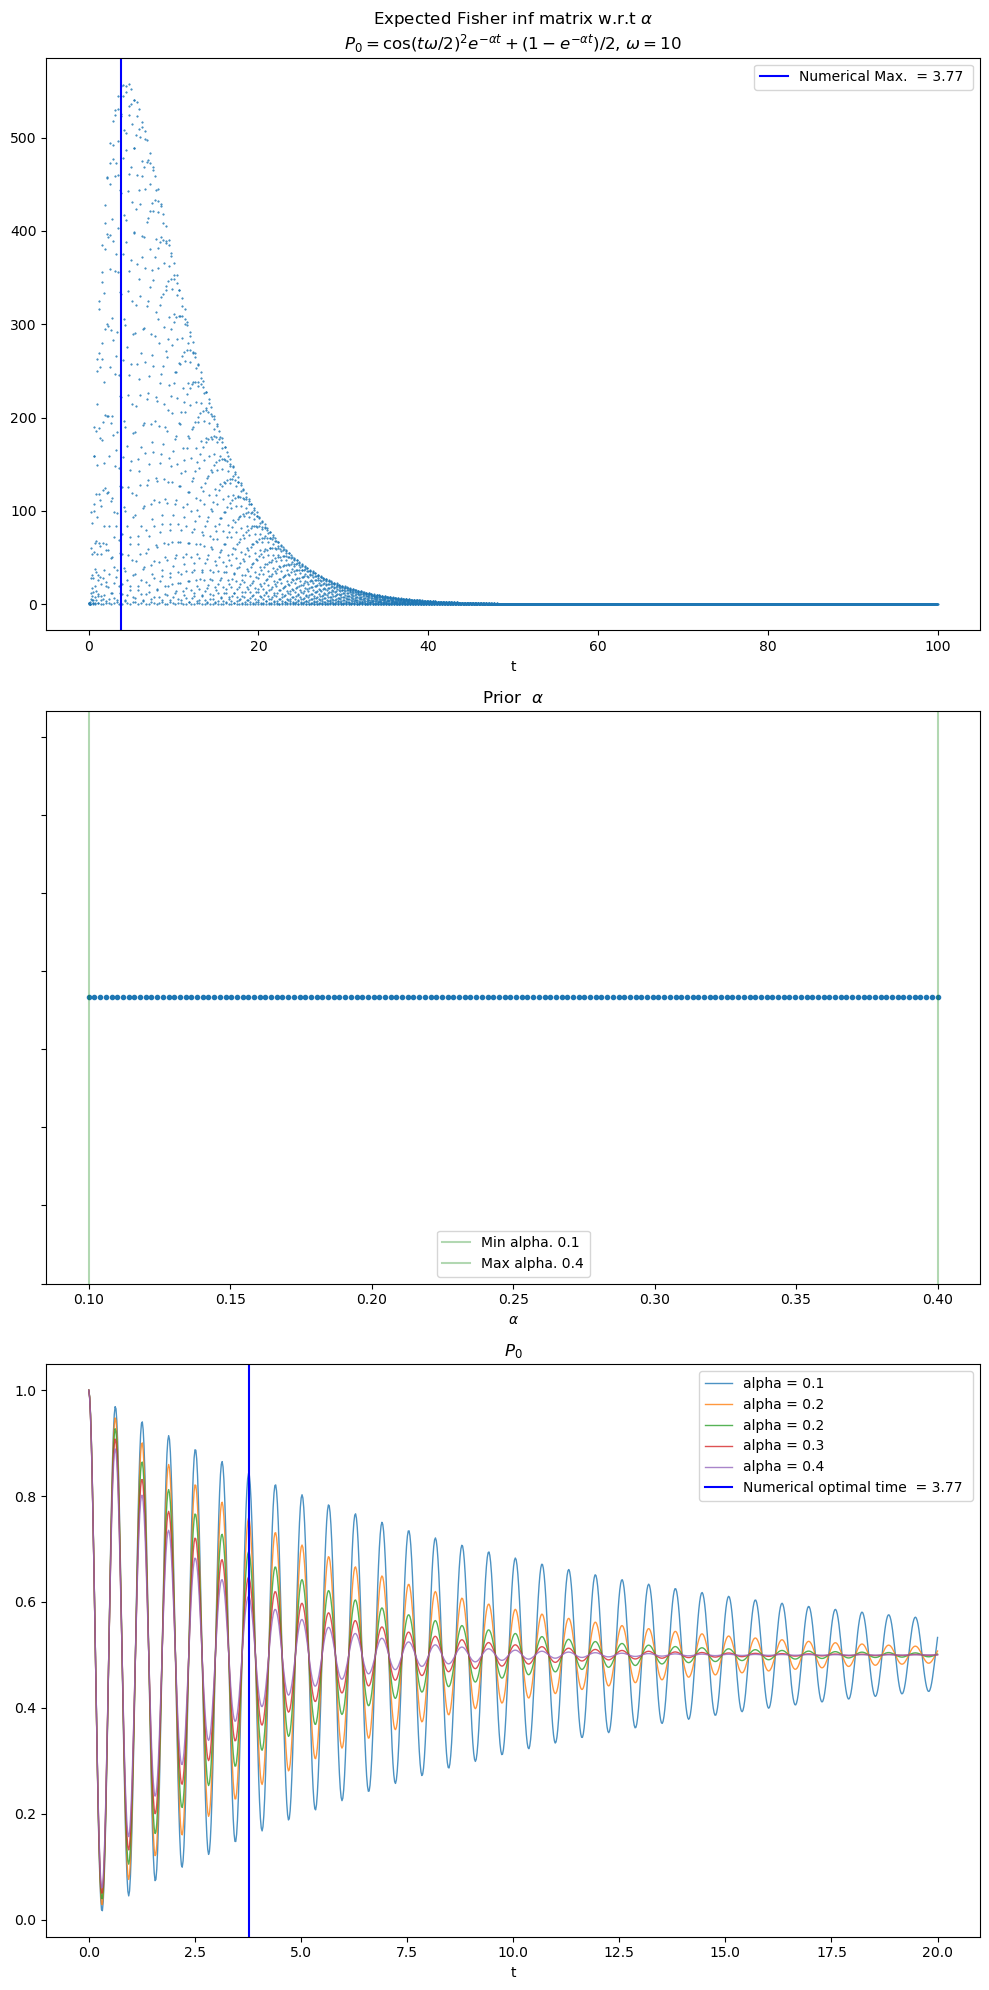

In [14]:
fig, axs = plt.subplots(3, 1, figsize=[10, 20])
axs[0].plot(t, y, ".", markersize=1)
axs[0].axvline(
    x=result_opt["x"],
    color="b",
    label=f'Numerical Max.  = {np.round(result_opt["x"][0],3)} ',
)


axs[0].set_title(
    r"Expected Fisher inf matrix w.r.t $\alpha$"
    + "\n"
    + r"$P_0 = \cos(t \omega /2  )^2  e^{-\alpha t}+ (1- e^{-\alpha t})/2 $, $\omega = 10$"
)
axs[0].set_xlabel("t")
axs[0].legend()


axs[1].plot(alfas, w, ".")
axs[1].axvline(x=min(alfas), color="g", alpha=0.3, label=f"Min alpha. {min(alfas)}")
axs[1].axvline(x=max(alfas), color="g", alpha=0.3, label=f"Max alpha. {max(alfas)}")
axs[1].set_title(r"Prior  $\alpha$")
axs[1].set_yticklabels("")
axs[1].set_xlabel(r"$\alpha$")
axs[1].legend()


tp = np.linspace(0.001, 20, 1000)
alfap = np.linspace(min(alfas), max(alfas), 5)
for alfa in alfap:
    axs[2].plot(
        tp,
        p_0_noisy(tp, omega, alfa),
        "-",
        markersize="2",
        linewidth=1,
        alpha=0.8,
        label=f"alpha = {np.round(alfa, 1)}",
    )
# plt.yscale('log')
axs[2].axvline(
    x=result_opt["x"],
    color="b",
    label=f'Numerical optimal time  = {np.round(result_opt["x"][0],3)} ',
)


axs[2].set_title(r"$P_0$")
axs[2].set_xlabel("t")
axs[2].legend()


fig.tight_layout()

# plt.savefig("img/fisher_2.pdf", dpi=600)
plt.plot()


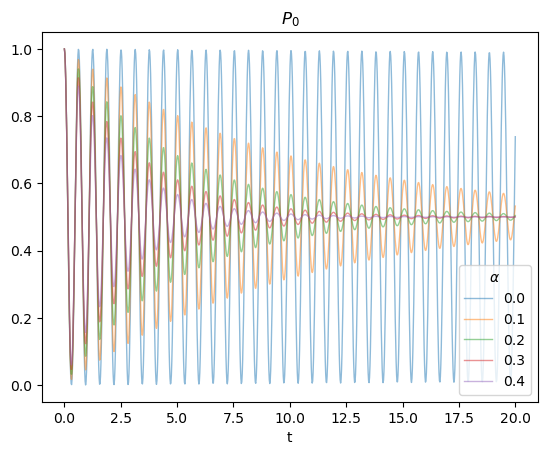

In [15]:
# plt.plot(alfas, 1/alfas)
tp = np.linspace(0.001, 20, 1000)
alfap = np.linspace(0.001, 0.4, 5)
for alfa in alfap:
    plt.plot(
        tp,
        p_0_noisy(tp, omega, alfa),
        "-",
        markersize="2",
        linewidth=1,
        alpha=0.5,
        label=f"{np.round(alfa, 1)}",
    )
# plt.yscale('log')
plt.title(r"$P_0$")
plt.xlabel("t")
plt.legend(title=r"$\alpha$")


In [16]:
result_opt["x"]

array([3.77002732])

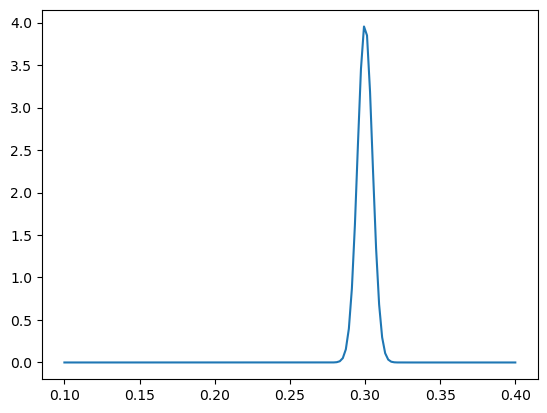

In [17]:
from scipy.stats import norm
xp = np.linspace(-3, 3, 150)
yp = [norm.pdf(x, loc=1, scale=0.1) for x in xp]
new_w = yp/np.sum(yp)
plt.plot(alfas, yp)

In [18]:
t = np.linspace(0.01, 100, 5000)

omega = 10
alfas = np.linspace(0.1, 0.4, 150)


from scipy.stats import norm

xp = np.linspace(-3, 3, 150)
yp = [norm.pdf(x, loc=1, scale=0.15) for x in xp]
new_w = yp / np.sum(yp)


from scipy.optimize import minimize, differential_evolution

f = lambda t: -1 * np.dot(
    new_w, np.array([fisher_inf_noisy(t, omega, alfa) for alfa in alfas])
)
# minimize(f, 4, bounds=[(0.001, 100.)])
result_opt = differential_evolution(f, bounds=[(0.001, 100.0)])

exp_f = np.vectorize(
    lambda t: np.sum([new_w * fisher_inf_noisy(t, omega, alfa) for alfa in alfas])
)
y = exp_f(t)


[]

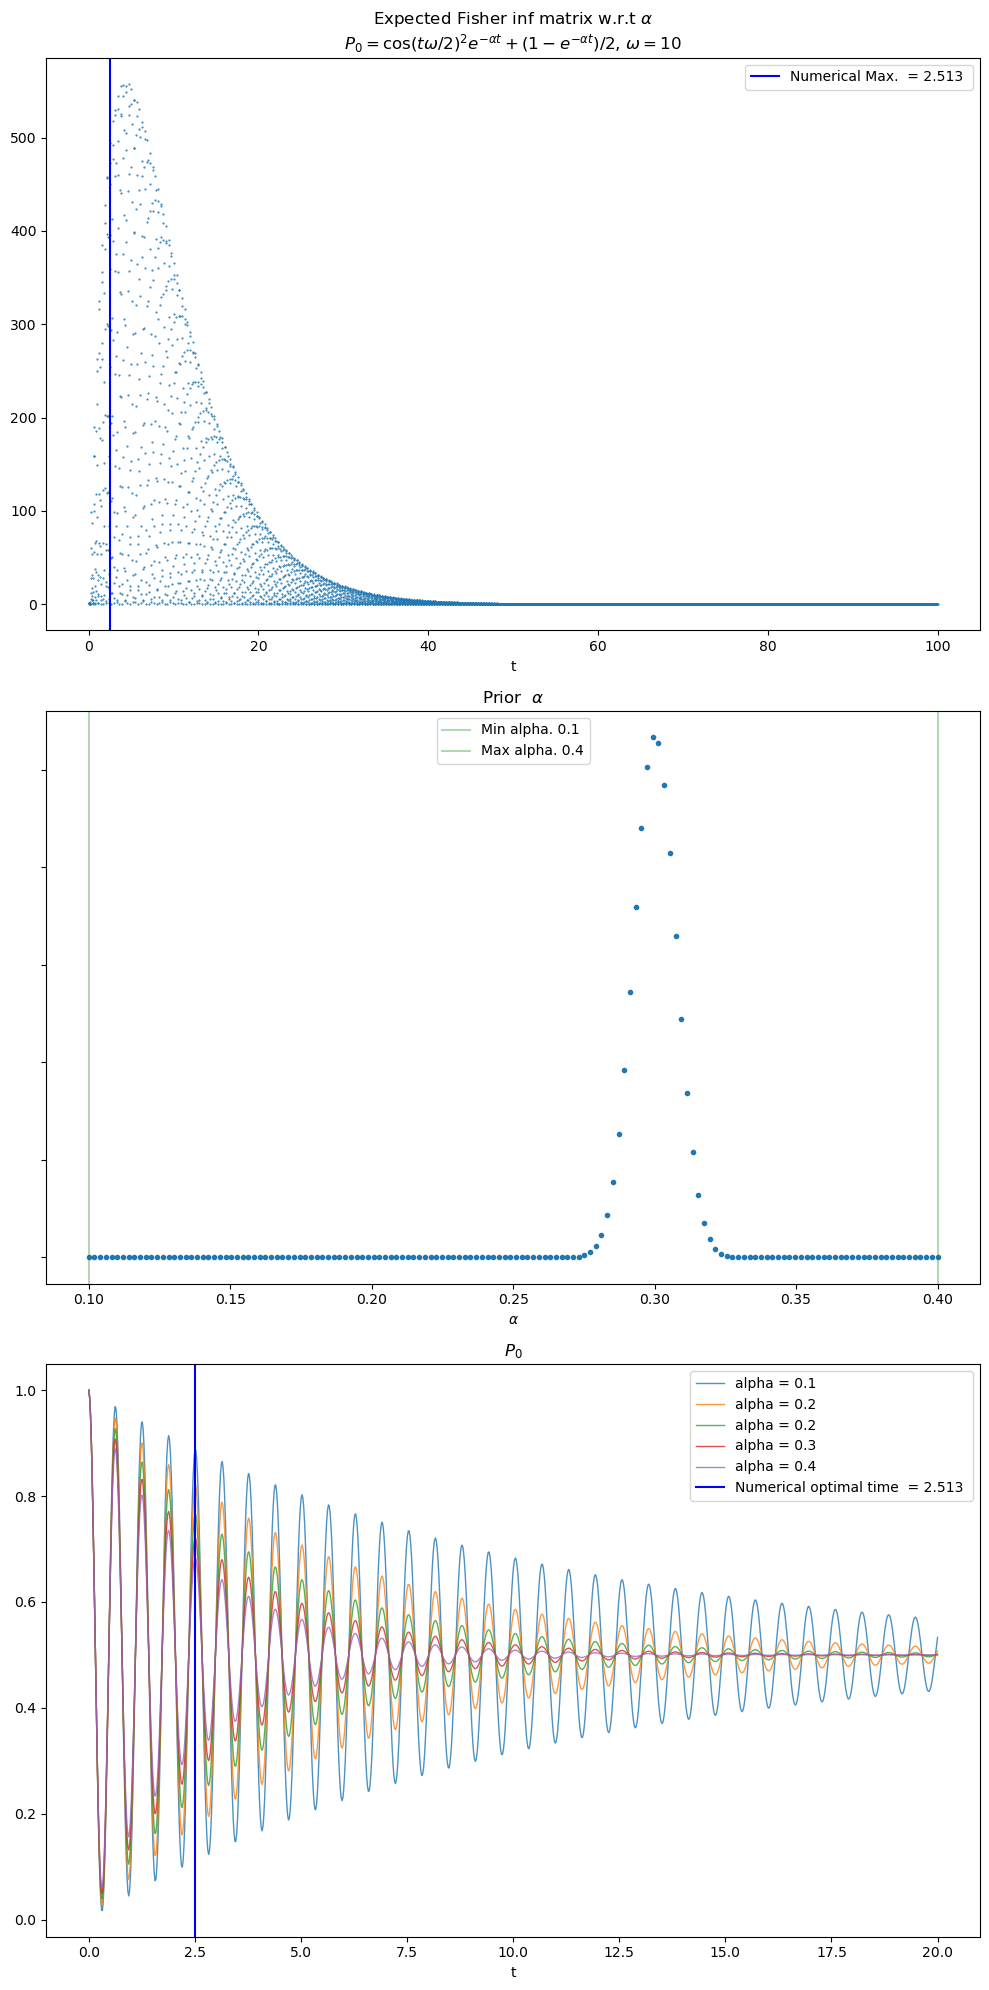

In [19]:
fig, axs = plt.subplots(3, 1, figsize=[10, 20])
axs[0].plot(t, y, ".", markersize=1)
axs[0].axvline(
    x=result_opt["x"],
    color="b",
    label=f'Numerical Max.  = {np.round(result_opt["x"][0],3)} ',
)


axs[0].set_title(
    r"Expected Fisher inf matrix w.r.t $\alpha$"
    + "\n"
    + r"$P_0 = \cos(t \omega /2  )^2  e^{-\alpha t}+ (1- e^{-\alpha t})/2 $, $\omega = 10$"
)
axs[0].set_xlabel("t")
axs[0].legend()


axs[1].plot(alfas, new_w, ".")
axs[1].axvline(x=min(alfas), color="g", alpha=0.3, label=f"Min alpha. {min(alfas)}")
axs[1].axvline(x=max(alfas), color="g", alpha=0.3, label=f"Max alpha. {max(alfas)}")
axs[1].set_title(r"Prior  $\alpha$")
axs[1].set_yticklabels("")
axs[1].set_xlabel(r"$\alpha$")
axs[1].legend()


tp = np.linspace(0.001, 20, 1000)
alfap = np.linspace(min(alfas), max(alfas), 5)
for alfa in alfap:
    axs[2].plot(
        tp,
        p_0_noisy(tp, omega, alfa),
        "-",
        markersize="2",
        linewidth=1,
        alpha=0.8,
        label=f"alpha = {np.round(alfa, 1)}",
    )
# plt.yscale('log')
axs[2].axvline(
    x=result_opt["x"],
    color="b",
    label=f'Numerical optimal time  = {np.round(result_opt["x"][0],3)} ',
)


axs[2].set_title(r"$P_0$")
axs[2].set_xlabel("t")
axs[2].legend()


fig.tight_layout()

# plt.savefig("img/fisher_3.pdf", dpi=600)
plt.plot()


# Comparing my model and exact

In [20]:
import numpy as np
import qutip as qu
import scipy
import solve_lindblad
import matplotlib.pyplot as plt
import derivatives


In [21]:
J = 0.3
c_ops = [J * qu.sigmax()]

omega = 5
H0 = omega * qu.sigmax()
psi0 = qu.basis(2, 0)
rho0 = qu.ket2dm(psi0)

projs = [np.array([[1, 0], [0, 0]]), np.array([[0, 0], [0, 1]])]


In [22]:
t = np.linspace(0.01, 10, 1000)

# omega = 10

# inf_mat = [derivatives.fisher_inf_one_particle(projs, rho0, H0, c_ops, ti, qu.sigmax() ) for ti in t]

In [23]:
# plt.plot(t, inf_mat, '.', markersize=1,  label=f'Lindblad')

# plt.plot(t, fisher_inf_noisy(t, omega, J), '.',  markersize=1,  label=f'Exact')

# plt.legend()
# plt.show()

In [24]:
import solve_lindblad 



[]

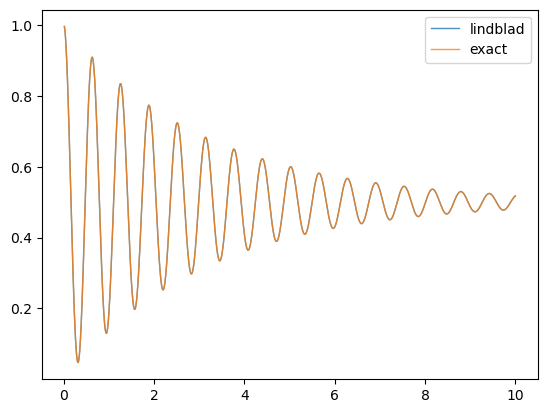

In [25]:
J = 0.4
c_ops = [J * qu.sigmax()]

t = np.linspace(0.01, 10, 3000)


p0_lindblad = [
    derivatives.compute_probability(
        solve_lindblad.evolve_dm(rho0, H0, c_ops, ti).full(), projs
    )[0]
    for ti in t
]
plt.plot(t, p0_lindblad, "-", markersize="2", linewidth=1, alpha=0.8, label=f"lindblad")
plt.plot(
    t,
    p_0_noisy(t, 2 * omega, J / 1.25),
    "-",
    markersize="2",
    linewidth=1,
    alpha=0.8,
    label=f"exact",
)
plt.legend()
plt.plot()


In [26]:
def dif(x):
    p0_lindblad = [
        derivatives.compute_probability(
            solve_lindblad.evolve_dm(rho0, H0, c_ops, ti).full(), projs
        )[0]
        for ti in t
    ]

    p0_exact = p_0_noisy(t, 2 * omega, J *x)

    return np.sum((np.array(p0_lindblad) - np.array(p0_exact))**2)



minimize(dif, 1.3)



      fun: 3.924410530912389e-15
 hess_inv: array([[0.0114633]])
      jac: array([-1.77370438e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([0.79999999])

In [27]:
1/0.8

1.25

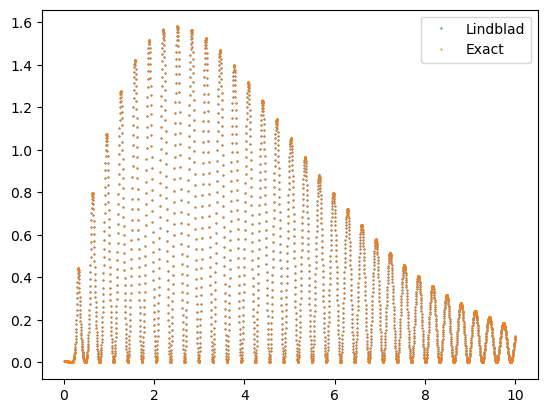

In [26]:
t = np.linspace(0.01, 10, 3000)


inf_mat = [
    derivatives.fisher_inf_one_particle(projs, rho0, H0, c_ops, ti, qu.sigmax())
    for ti in t
]

plt.plot(t, inf_mat, ".", markersize=1, label=f"Lindblad")

plt.plot(
    t, fisher_inf_noisy(t, 2 * omega, J / 1.25), ".", markersize=1, label=f"Exact"
)

plt.legend()
plt.show()


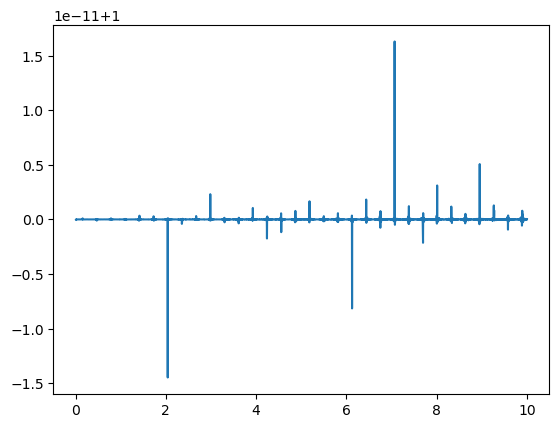

In [27]:
exact = fisher_inf_noisy(t, 2 * omega, J / 1.25)
plt.plot(t, inf_mat/exact)

In [28]:
np.sum(np.array(exact) -np.array(inf_mat))**2

3.0777436637252544e-25

In [29]:
alfas

array([0.1       , 0.10201342, 0.10402685, 0.10604027, 0.10805369,
       0.11006711, 0.11208054, 0.11409396, 0.11610738, 0.11812081,
       0.12013423, 0.12214765, 0.12416107, 0.1261745 , 0.12818792,
       0.13020134, 0.13221477, 0.13422819, 0.13624161, 0.13825503,
       0.14026846, 0.14228188, 0.1442953 , 0.14630872, 0.14832215,
       0.15033557, 0.15234899, 0.15436242, 0.15637584, 0.15838926,
       0.16040268, 0.16241611, 0.16442953, 0.16644295, 0.16845638,
       0.1704698 , 0.17248322, 0.17449664, 0.17651007, 0.17852349,
       0.18053691, 0.18255034, 0.18456376, 0.18657718, 0.1885906 ,
       0.19060403, 0.19261745, 0.19463087, 0.1966443 , 0.19865772,
       0.20067114, 0.20268456, 0.20469799, 0.20671141, 0.20872483,
       0.21073826, 0.21275168, 0.2147651 , 0.21677852, 0.21879195,
       0.22080537, 0.22281879, 0.22483221, 0.22684564, 0.22885906,
       0.23087248, 0.23288591, 0.23489933, 0.23691275, 0.23892617,
       0.2409396 , 0.24295302, 0.24496644, 0.24697987, 0.24899

In [30]:
exp_f = np.vectorize(
    lambda t: np.sum([new_w * fisher_inf_noisy(t, omega, alfa) for alfa in alfas])
)
y = exp_f(t)

In [31]:



class fake_updater():
    def __init__(self, weights, locations) -> None:
        self.particle_weights = weights
        self.particle_locations = locations

    class model:
        def __init__(self):
            return
        
        def create_H0( omega):
            return omega * qu.sigmax()    
        
    
locations = np.array([omega*np.ones(len(alfas)),alfas]).T
fake_updater = fake_updater(new_w, locations)        

In [140]:
locations

array([[5.        , 0.1       ],
       [5.        , 0.10201342],
       [5.        , 0.10402685],
       [5.        , 0.10604027],
       [5.        , 0.10805369],
       [5.        , 0.11006711],
       [5.        , 0.11208054],
       [5.        , 0.11409396],
       [5.        , 0.11610738],
       [5.        , 0.11812081],
       [5.        , 0.12013423],
       [5.        , 0.12214765],
       [5.        , 0.12416107],
       [5.        , 0.1261745 ],
       [5.        , 0.12818792],
       [5.        , 0.13020134],
       [5.        , 0.13221477],
       [5.        , 0.13422819],
       [5.        , 0.13624161],
       [5.        , 0.13825503],
       [5.        , 0.14026846],
       [5.        , 0.14228188],
       [5.        , 0.1442953 ],
       [5.        , 0.14630872],
       [5.        , 0.14832215],
       [5.        , 0.15033557],
       [5.        , 0.15234899],
       [5.        , 0.15436242],
       [5.        , 0.15637584],
       [5.        , 0.15838926],
       [5.

In [121]:
fake_updater.model.create_H0(0.3).full()

array([[0. +0.j, 0.3+0.j],
       [0.3+0.j, 0. +0.j]])

In [122]:
# exp_f_lindblad = [derivatives.expected_fisher_inf_matrix(t, fake_updater, projs, rho0, qu.sigmax()) for t in t]

In [ ]:
t

array([ 0.01      ,  0.01333111,  0.01666222, ...,  9.99333778,
        9.99666889, 10.        ])

In [ ]:
t

In [157]:
from numba import jit
import derivatives 

In [155]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [53]:
# @jit(nopython=True)
# def fun(iter, *args):
#     for _ in range(iter):
#         derivatives.expected_fisher_inf_matrix(*args)

In [120]:
derivatives.fun(10, 0.3, fake_updater, projs, rho0, qu.sigmax())

AttributeError: module 'derivatives' has no attribute 'fun'


Error compiling Cython file:
------------------------------------------------------------
...
import derivatives
def fun(iter, *args):
    for _ in range(iter):
        expected_fisher_inf_matrix_2(*args)
       ^
------------------------------------------------------------

/home/antonio/.cache/ipython/cython/_cython_magic_1fa9b432600c12a90fe6c34fd264c753.pyx:4:8: undeclared name not builtin: expected_fisher_inf_matrix_2


In [166]:
fun(10, 0.3, fake_updater, projs, rho0, qu.sigmax())

In [167]:
derivatives.expected_fisher_inf_matrix(0.3, fake_updater, projs, rho0, qu.sigmax())

0.6593296333582004

In [197]:
%%cython 
import derivatives
import numpy as np

def expected_fisher_inf_matrix_2(t, locations, weights, create_H0, projectors, rho0, bare_jump_op):


    fisher_inf_array = np.zeros(len(locations))

    for i in range(len(locations)):
        # Now make H0
        # j operator = gamma * bare_jump_op
        H0 = create_H0(locations[i, 0])
        jump_operator = locations[i, 1] * bare_jump_op
        fisher_inf_array[i] = derivatives.fisher_inf_one_particle(
            projectors, rho0, H0, jump_operator, t, bare_jump_op
        )
    return np.dot(weights, fisher_inf_array)    
 


def fun(iter, *args):
    for _ in range(iter):
        expected_fisher_inf_matrix_2(*args)
    pass

In [198]:
# fun( 1, 0.3, fake_updater, projs, rho0, qu.sigmax())

TypeError: expected_fisher_inf_matrix_2() takes exactly 7 positional arguments (5 given)

In [202]:
fun(10, 0.3, fake_updater.particle_locations, fake_updater.particle_weights, fake_updater.model.create_H0, projs, rho0, qu.sigmax())

In [203]:
def partial_rho_gamma(rho0, H0, operators, t, bare_jump_op, no_qubits=1):
    liouvillian = qu.liouvillian(H0, c_ops=operators)
    dissipator = qu.lindblad_dissipator(bare_jump_op)

    # print(dissipator)
    rho_sup = qu.to_super(rho0)
    rho_evol = (
        t*0.5
        * scipy.linalg.expm(liouvillian.full() * t)
        @ dissipator.full()
        @ rho_sup.full()
    )
    # print(rho_evol)
    dm_evol = rho_evol[:, 0].reshape(-1, 2**no_qubits)
    # print(dm_evol)
    dm_evol = qu.Qobj(dm_evol)
    return dm_evol

In [206]:
alfa

0.4

In [230]:
%%time
partial_rho_gamma(rho0, H0, alfa*qu.sigmax(), 0.3, qu.sigmax())

CPU times: user 0 ns, sys: 3.31 ms, total: 3.31 ms
Wall time: 3.06 ms


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.13490588+0.j          0.        +0.01923037j]
 [ 0.        -0.01923037j -0.13490588+0.j        ]]

In [231]:
%%time
derivatives.partial_rho_gamma(rho0, H0, alfa*qu.sigmax(), 0.3, qu.sigmax())

CPU times: user 4.82 ms, sys: 6 µs, total: 4.83 ms
Wall time: 4.55 ms


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.13490588+0.j          0.        +0.01923037j]
 [ 0.        -0.01923037j -0.13490588+0.j        ]]

In [232]:
def compute_probability(rho, projs):
    return np.abs(np.real([np.trace(proj_i @ rho) for proj_i in projs]))

In [238]:
%%time
compute_probability(rho0.full(), projs)




CPU times: user 135 µs, sys: 1 µs, total: 136 µs
Wall time: 125 µs


array([1., 0.])

In [239]:
%%time
derivatives.compute_probability(rho0.full(), projs)

CPU times: user 140 µs, sys: 1 µs, total: 141 µs
Wall time: 129 µs


array([1., 0.])

In [246]:
def NOC_expected_fisher_inf_matrix_2(t, locations, weights, create_H0, projectors, rho0, bare_jump_op):
    # key variables: H0, j_operators
    # ez fixed inputs: rho0, projectors, bare_jump_operators``

    # weights = updater.particle_weights
    # locations = updater.particle_locations

 

    fisher_inf_array = np.zeros(len(locations))

    for i in range(len(locations)):
        # Now make H0
        # j operator = gamma * bare_jump_op
        H0 = create_H0(locations[i, 0])
        jump_operator = locations[i, 1] * bare_jump_op
        fisher_inf_array[i] = derivatives.fisher_inf_one_particle(
            projectors, rho0, H0, jump_operator, t, bare_jump_op
        )
    return np.dot(weights, fisher_inf_array)    


def NOC_fun(iter, *args):
    for _ in range(iter):
        NOC_expected_fisher_inf_matrix_2(*args)
    pass

In [249]:
%%time
NOC_fun(1, 0.3, fake_updater.particle_locations, fake_updater.particle_weights, fake_updater.model.create_H0, projs, rho0, qu.sigmax())

CPU times: user 846 ms, sys: 0 ns, total: 846 ms
Wall time: 843 ms


In [250]:
%%time 
fun(1, 0.3, fake_updater.particle_locations, fake_updater.particle_weights, fake_updater.model.create_H0, projs, rho0, qu.sigmax())

CPU times: user 790 ms, sys: 7.95 ms, total: 798 ms
Wall time: 793 ms
